In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 14:22:30 2018

@author: Cerx
"""

import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


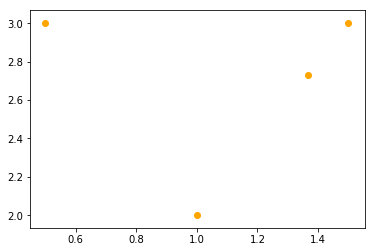

In [2]:
#generate 3 points
p1 = (1,2)
p2 = (.5,3)
p3 = (1.5, 3)
fig = plt.figure(1)
plt.scatter(p1[0], p1[1], color = 'orange')
plt.scatter(p2[0], p2[1], color = 'orange')
plt.scatter(p3[0], p3[1], color = 'orange')

#generate q0
x0 = (p3[0]-p2[0])*random() + p2[0]

def out_m(p1,p2):
    return (p2[1]-p1[1])/(p2[0]-p1[0])

def out_b(p1,p2):
    m = out_m(p2,p1)
    return p1[1] - m*p1[0]

def y(m,x,b):
    return m*x + b

ymax = y(out_m(p2,p3), x0, out_b(p2,p3))
ymin_left = y(out_m(p1,p2), x0, out_b(p1,p2))
ymin_right = y(out_m(p1,p3), x0, out_b(p1,p3))

y0 = (p3[1]-p1[1])*random() + p1[1]
if x0 < p1[0]:
    while y0 < ymin_left or y0 > ymax:
        y0 = (p2[1]-p1[1])*random() + p1[1]
else:
    while y0 < ymin_right or y0 > ymax:
        y0 = (p3[1]-p1[1])*random() + p1[1]
q0 = (x0,y0)
plt.scatter(q0[0], q0[1], color = 'orange')

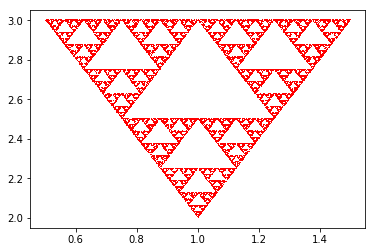

In [4]:
#generate q
N = 20000
q_x = []
q_y = []
while N > 0:
    specifier = random()
    if 0 <= specifier < (1/3):
        target = p1
    elif (1/3) <= specifier < (2/3):
        target = p2
    elif (2/3) <= specifier < (3/3):
        target = p3
    
    q = (.5*(target[0]+q0[0]), .5*(target[1]+q0[1]))
    plt.plot(q[0], q[1], color = 'red', marker = ',')
    #plt.scatter(q[0], q[1], color = 'red', marker = '.', linewidths = 0.5)
    q_x.append(q[0])
    q_y.append(q[1])
    q0 = q
    N -= 1
    specifier = random()
#plt.scatter(q_x, q_y, color = 'red', marker = '.', linewidths = 0.5)

In [8]:
#generate equilateral triangle
#p1 = np.array((0,0))
#p2 = np.array((np.sqrt(3),2))
#p3 = np.array((2*np.sqrt(3),0))
p1 = np.array((0,0))
p2 = np.array((3,4))
p3 = np.array((6,2))


fig = plt.figure('Lattice 2')
plt.scatter(p1[0], p1[1], color = 'orange')
plt.scatter(p2[0], p2[1], color = 'orange')
plt.scatter(p3[0], p3[1], color = 'orange')

def mini_triangle(triangle):
    index = [0,1,2]
    out = []
    for l in range(3):
        copy = np.copy(index)
        copy = list(copy)
        del copy[l]
        m1 = triangle[l]
        m2 = .5*(triangle[l] + triangle[copy[0]])
        m3 = .5*(triangle[l] + triangle[copy[1]])
        #temp = [np.round(m1,2),np.round(m2,2),np.round(m3,2)]
        temp = [m1,m2,m3]
        out.append(temp)
    return out

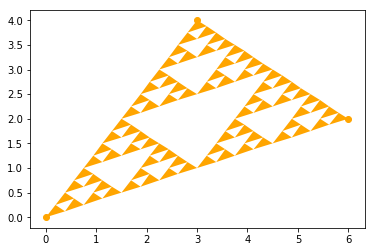

In [9]:
fig = plt.figure('Lattice 2')
ax = plt.axes()
plt.scatter(p1[0], p1[1], color = 'orange')
plt.scatter(p2[0], p2[1], color = 'orange')
plt.scatter(p3[0], p3[1], color = 'orange')

def mini_triangle(triangle):
    index = [0,1,2]
    out = []
    for l in range(3):
        copy = np.copy(index)
        copy = list(copy)
        del copy[l]
        #print(copy)

        m1 = triangle[l]
        m2 = .5*(triangle[l] + triangle[copy[0]])
        m3 = .5*(triangle[l] + triangle[copy[1]])
        temp = [np.round(m1,2),np.round(m2,2),np.round(m3,2)]
        out.append(temp)
    return out

def deductor(triangle, tier):
    if tier == 0:
        mini = Polygon(triangle, facecolor = 'orange')
        plt.figure('Lattice 2')
        ax.add_patch(mini)
        #return mini,
    else:
        three_triangles = mini_triangle(triangle)
        for t in three_triangles:
            deductor(t, tier - 1)
            #return deductor(t, tier - 1) #for some reason, only one triangle plotted of this used

tier = 4
deductor([p1,p2,p3],tier)

In [7]:
D = np.log(3)/np.log(2)
print('D =', D)

D = 1.5849625007211563
